
# <font color="Blue">**[1일차 오후] 객체인식을 위한 이미지데이터 수집** <font>

## <font color="red">**1일차 최종 제출물은 본 ipynb 파일입니다.**
- 조별로 완성된 본 파일을 " 1일차_OO반_OO조.ipynb" 로 파일명을 작성하시어 제출하시고 추출된 이미지데이터셋(130장)를 "1일차_OO반_OO조.zip"으로 압축하여 제출 바랍니다.


# 앞서 배운 내용을 중심으로 본격적으로 이미지 데이터 수집을 위한 전단계 진행하봅니다.
# 사전 준비할 사항이 있습니다.
* car_bike.mp4 파일을 본인 노트북에 다운로드해 주세요

----

# <font color="red">**[미션1]  CCTV 폴더를 만들어 안전모 사례와 동일하게 tutorial 폴더와 image, image30, image100 폴더를 만들어, 캡쳐한 이미지를 각 폴더에 저장해 주세요**
- CCTV폴더 생성
- CCTV > tutorial , CCTV>image, CCTV>image100, CCTV>image30 폴더 생성
- CCTV > tutorial 에 car_bike.mp4 영상 저장
- CCTV>image에는 영상의 전체 프레임 이미지 추출
- CCTV>image100 에는 100프레임부터 200프레임 이미지만 추출
- CCTV>image30 에는 30 프레임단위로 이미지 추출 (30, 60, 90, 120....)

## <font color="Blue">**1. 환경 설정하기**<font>

### **1) 구글 드라이브 연결하기**

In [1]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **2) 경로 확인하기**
<font color="red">※ 주의. 경로는 절대 변경하지 마세요.</font>

In [2]:
# ROOT_PATH 확인
import os

ROOT_PATH = "/content/drive/MyDrive/cctv"
if not os.path.exists(ROOT_PATH):
      os.makedirs(ROOT_PATH)

TUTORIAL_PATH = "/content/drive/MyDrive/cctv/tutorial"
if not os.path.exists(TUTORIAL_PATH):
      os.makedirs(TUTORIAL_PATH)


if os.path.exists("/content/drive/MyDrive/cctv") :  #경로가 있는지 확인
  ROOT_PATH = "/content/drive/MyDrive/cctv"
  print("helmet 폴더가 잘생성되어 있습니다.")
else :
  print("/content/drive/MyDrive에 'cctv' 폴더를 생성해 주세요")
# TUTORIAL 데이터 경로

if os.path.exists( ROOT_PATH + "/tutorial") :  #경로가 있는지 확인
  TUTORIAL_PATH = ROOT_PATH + "/tutorial"
  print("cctv/tutorial 폴더가 잘생성되어 있습니다.")
else :
  print("'cctv' 폴더 밑에 'tutorial'를 생성해 주세요")


helmet 폴더가 잘생성되어 있습니다.
cctv/tutorial 폴더가 잘생성되어 있습니다.


In [3]:
print(TUTORIAL_PATH)
print(ROOT_PATH)

/content/drive/MyDrive/cctv/tutorial
/content/drive/MyDrive/cctv


### **3) 라이브러리 불러오기**
필요시 추가 라이브러리는 설치해서 사용하세요.

In [4]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
#쥬피터노트북에서 바로 그림을 볼수 있게 하는 역할

---

## <font color="Blue">**2. 데이터 불러오기**<font>
* OpenCV 라이브러리를 활용해서 영상 파일("car_bke.mp4")을 불러오고, 변수명 video에 저장하세요.
   
    >* 파일경로 TUTORAL_PATH에 저장된 car_bike.mp4 파일을 video라는 변수에 저장하세요.
    >* 저장된 영상 파일의 정보를 확인하세요.(영상의 가로, 세로, 총 프레임 수, fps 정보, 영상 길이)


### <font color="green">**[실습1]  파일경로 TUTORIAL_PATH 내 "car_bike.mp4" 파일을 가져와서 어떤 영상인지 플레이해 보세요.** </font>

<font color="red">**[미션 1.1] cv2를 이용해 video라는 변수에 car_bike.mp4 파일 로딩하기**</font>  

In [7]:
# 파일경로 TITORIAL_PATH 내 "car_bike.mp4" 파일을 cv2.VideoCapture()함수를 사용해 video에 저장해보기

video = cv2.VideoCapture('/content/drive/MyDrive/cctv/tutorial/car_bike.mp4')


In [8]:
# video가 열렸는지 확인해보기(열렸다는 의미는 메모리에 video파일이 올라와 있어, 정보와 이미지를 추출할 준비가 되어 있다는 의미임)
# 참고로 video.isOpened()가 False이면 데이터를 가지고 올수 없고, True일때만 가능함

video.isOpened()



True

<font color="red">**[미션 1.2] video 파일을 열어서 해당 화면으로 영상을 플레이해보기**
-  구글에서 "코랩에서 비디오 재생"이라고 검색
- " https://whiteduck.tistory.com/160 " 참조

In [10]:
# 파일 루트만 변경합니다.

from IPython.display import HTML
from base64 import b64encode

mp4 = open(TUTORIAL_PATH + '/car_bike.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


Output hidden; open in https://colab.research.google.com to view.

### <font color="green">**[실습2] 영상 파일의 정보를 확인하세요.**</font>
> 영상의 가로, 세로, 총 프레임 수, FPS 정보, 영상 길이 정보입니다.

<font color="red">**[미션 2.1]  video, 즉 영상의 정보를 가지고 오세요(https://deep-learning-study.tistory.com/107)**</font>

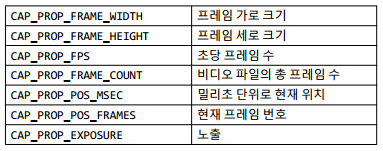

In [11]:
# 영상의 정보들을 가지고 옵니다.

# 우선 열려있는 video를 닫고 다시 로딩하는 것이 메모리에 좋습니다.
video.release()
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

########### 함께 해보기 - 저장된 비디오의 정보 몇개만 확인해보기
# 영상의 가로, 세로, 총 프레임 수, FPS 정보로 가지고 옵니다.
video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)

video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)

video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)

video_fps = video.get(cv2.CAP_PROP_FPS)

print("가로 :", video_width)
print("세로 :", video_height)
print("총 프레임 수 :", video_length)
print("FPS :", video_fps)

#해당 비디오를 가지고 이용한 후에는 해당 비디오를 메모리에세 제거하기 위해 release함수를 호출합니다.
video.release()

가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 274.0
FPS : 23.976023976023978


In [12]:
# 총 영상의 길이는 FPS와 프레임수를 알면 됩니다. 전체영상시간(초) = 전체프레임수/(초당프레임수), 예시.전체가 600프레임이고, 60 FPS이면, 전체 시간은 10초

video_scale = video_length / video_fps

print('영상 길이 : ', video_scale)


영상 길이 :  11.428083333333333


---



## <font color="Blue">**3. 영상으로부터 이미지 데이터 추출하기**
* OpenCV 라이브러리를 활용해서 영상 파일("car_bike.mp4")을 불러온 후, 모든 프레임 또는 일부 프레임을 저장해봅니다.
   
    >* 파일경로 TUTORAL_PATH>image
    >* 총 몇개의 파일들이 저장되었는지 확인


### <font color="green">**[실습3]동영상에서 이미지 컷 하나만 가지고와서 저장해 보세요**

#### <font color="red">**[미션 3.1] 동영상에서 프레임 이미지 하나만 가지고 와 보세요.**
- **영상의 프레임 하나만 이미지로 가지고 오기** (**video.read()**활용)
- https://thinking-developer.tistory.com/61

In [13]:
# 코랩에서는 cv2의 imshow가 안되기 때문에 다른 방법으로 진행해야 함
# https://overface.tistory.com/573

from google.colab.patches import cv2_imshow

비디오가 열려 있나요?:  True
1  번째 프레임을 읽었습니다.
프레임을 읽었는지요?:  True
읽은 프레임의 이미지데이터(numpy형태)는?  
 [[[81 87 82]
  [82 88 83]
  [81 87 82]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[82 88 83]
  [82 88 83]
  [81 87 82]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[82 88 83]
  [83 89 84]
  [82 88 83]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[56 49 41]
  [56 49 41]
  [56 49 41]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[47 41 36]
  [47 41 36]
  [47 41 36]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[43 37 32]
  [43 37 32]
  [43 37 32]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


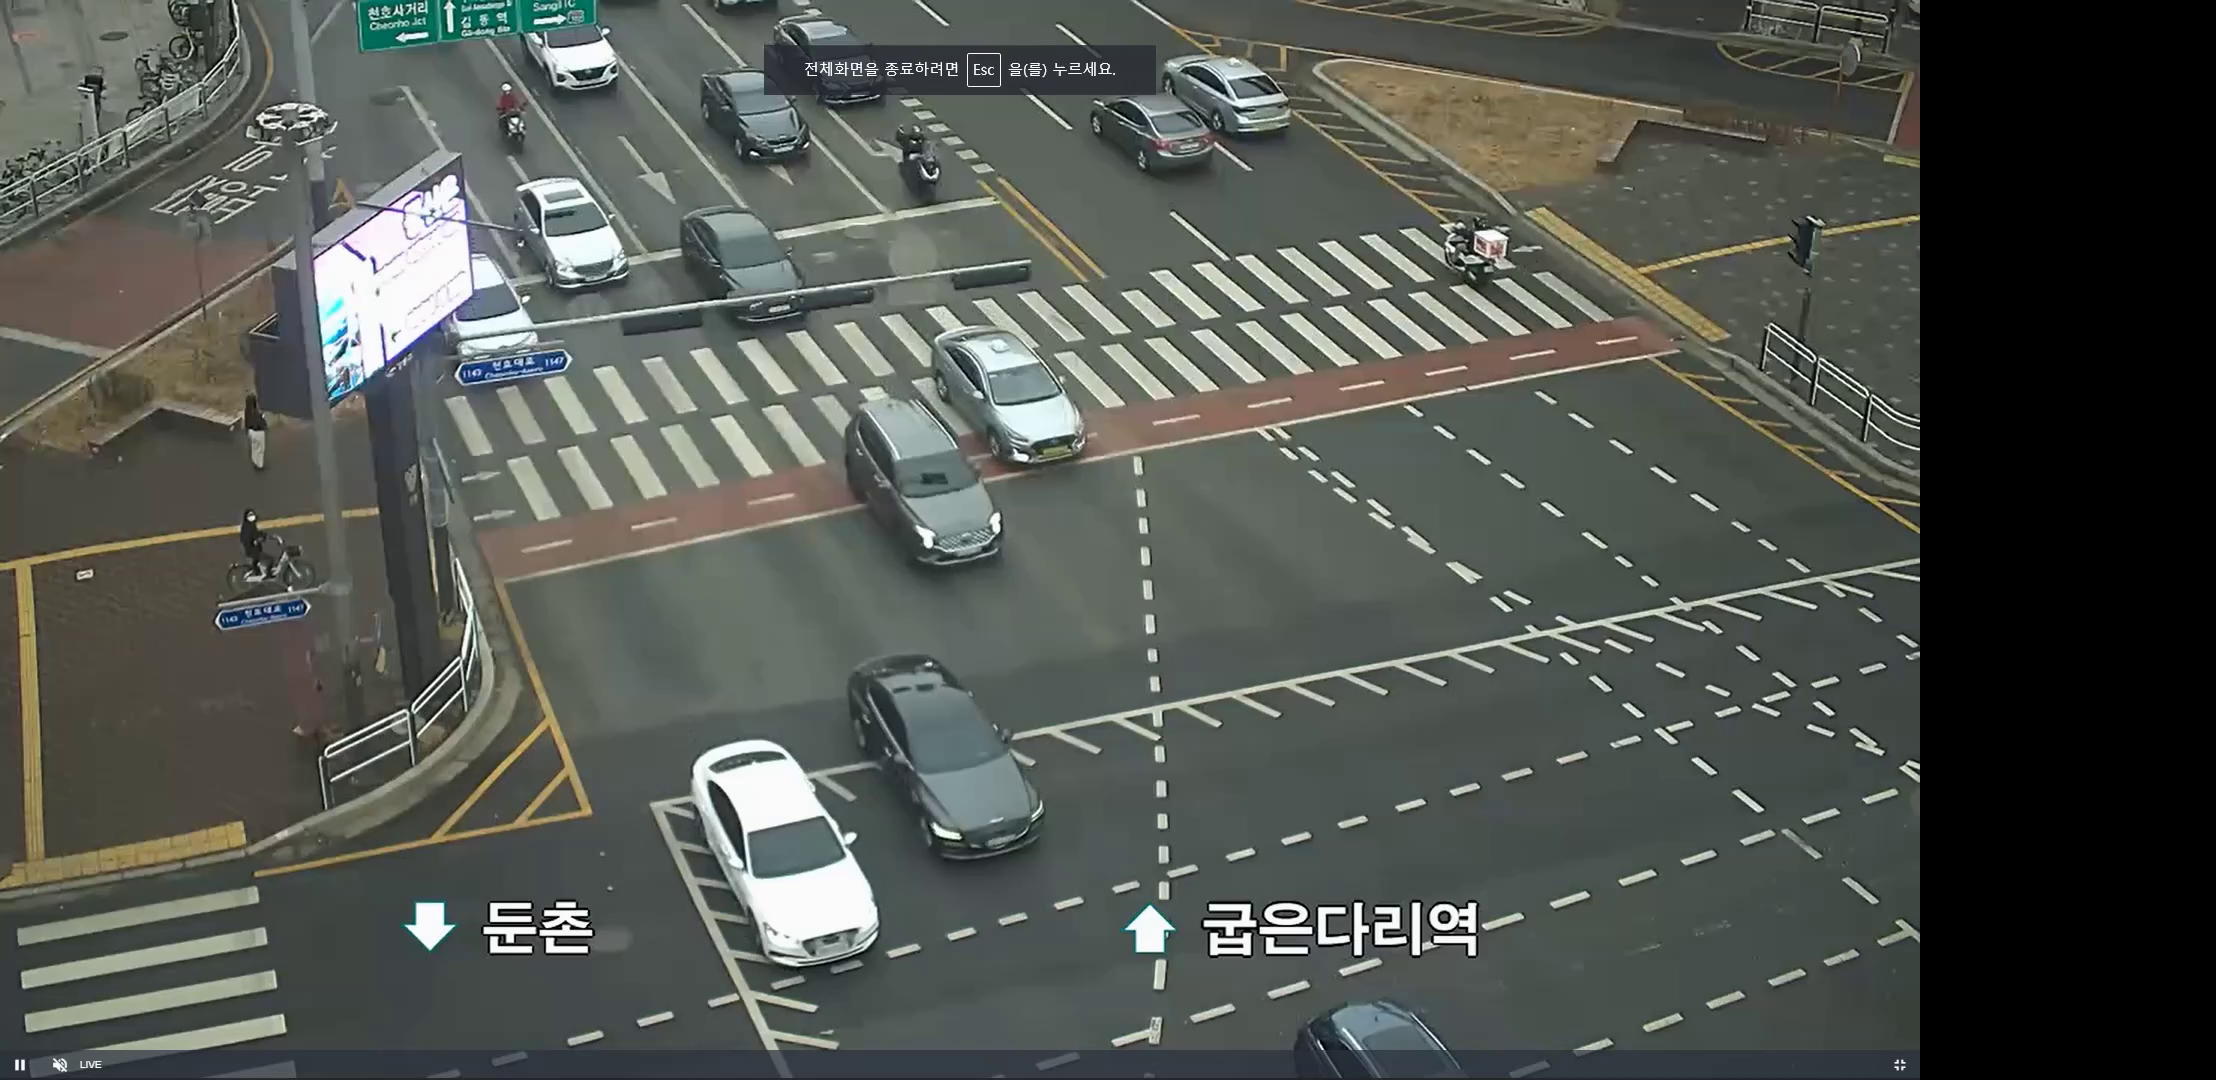

In [14]:
#비디오에서 이미지 하나 첫 프레임 가져오기


#비디오에서 영상 가져오기
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

#영상이 열려 있나 확인 하기
print("비디오가 열려 있나요?: ", video.isOpened())

# read를 통해 프레임을 하나씩 읽으면서 ret값은 프레임을 읽었는지 못 읽었는지 확인, True이면 제대로 읽은 것, 이미지는 frame에 저장
ret,frame = video.read()
print(int(video.get(cv2.CAP_PROP_POS_FRAMES)), " 번째 프레임을 읽었습니다.")
print("프레임을 읽었는지요?: ", ret)
print("읽은 프레임의 이미지데이터(numpy형태)는? ","\n", frame)

#이미지 보여주기, cv2.imshow는 로컬에서 진행. 코랩에서는 cv2_imshow 안됨
cv2_imshow(frame)

#비디오를 메모리에서 제거하기
video.release()




##### **[참조] 특정 번째 프레임을 추출하고 싶을때**

In [16]:
#비디오에서 특정 이미지 가져오기

#비디오에서 영상 가져오기
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

#영상이 열려 있나 확인 하기
print("비디오가 열려 있나요?: ", video.isOpened())

################ 함께 해보기 - 500번째 프래임 그림을 가지고 오세요
# 특정번째 프레임을 가지고 오고 싶을땐때는 video.set(cv2.CAP_PROP_POS_FRAMES, 프레임-1) 를 활용한다.(0부터 시작)

video.set(cv2.CAP_PROP_POS_FRAMES, 100)

ret,frame = video.read()
print(int(video.get(cv2.CAP_PROP_POS_FRAMES)), " 번째 프레임을 읽었습니다.")

#이미지 보여주기, cv2.imshow는 로컬에서 가능, 코랩에서는 cv2_imshow로 진행
cv2_imshow(frame)

#비디오를 메모리에서 제거하기
video.release()




Output hidden; open in https://colab.research.google.com to view.

#### <font color="red">**[미션 3.2] 동영상에서 모든 프레임이미지를 CCTV>image 폴더에 저장하시고 몇개의 이미지인지 확인해 보세요.**</font>


- **1단계:프레임수(=저장할 이미지수)를 확인하고 저장할 폴더를 지정합니다.**
 - 사전에 구글 드라이브 CCTV밑에 image라는 폴더를 만들어 주세요

In [18]:
import os

#비디오에서 영상 가져오기
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

#프레임 이미지저장할 위치 지정하기, 사전에 helmet 폴더 밑에 image 폴더 생성해 두기
TUTORIAL_IMAGE = ROOT_PATH +"/image"
if not os.path.exists(TUTORIAL_IMAGE):
      os.makedirs(TUTORIAL_IMAGE)

#저장할 image 폴더 여부와 비디오 오픈 여부 확인
print("이미지폴더 생성 여부:", os.path.exists(TUTORIAL_IMAGE))
print("영상 열려있는 여부:", video.isOpened())

#전체 영상 프레임 수 확인하기
print(video.get(cv2.CAP_PROP_FRAME_COUNT))

이미지폴더 생성 여부: True
영상 열려있는 여부: True
274.0


- **2단계:while(video.isOpened())를 활용해 하나씩 프레임을 읽으면서 저장합니다.**
 -
사이즈가 큰 경우 가져올때 image = cv2.resize(frame, (500,400))을 활용하여 용량을 줄여 저장합니다.

In [20]:
# 화면에 보여주는 imshow 호출하고 화면에 보여줍니다.imwrite 활용하여 파일 저장하기


# 화면에 보여주는 imshow 호출
from google.colab.patches import cv2_imshow

video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

while(video.isOpened()):
  ret,frame = video.read()

  # 비디오를 계속 한 프레임씩 열면서 화면에 뿌린다. 더이상 변환할 프레임이미지가 없으면 오픈된 비디오에서 프레임읽는 것을 빠져나온다.

  ################# 함께 해보기 - cv2.resize를 통해 프레임을 줄여줍니다.
  # 화면에 보여 주기 위해 이미지 사이즈는 줄여서 진행 500x400으로 변경 ㅡ frame를 가지고 와서 사이즈 줄여서 image 에 저장
  image = cv2.resize(frame, (500,400))

  # 이미지 보여주기, 프레임이 많으면 다운될 수 있어서 해당 코드는 주석 처리하는 것을 권장함
  # cv2_imshow(image)

  ################## 함께 해보기 - 이미지 폴더에 현재프레임번호로 저장한 것을 저장 여부를 프린트 함
  # 이미지 폴더에 프레임번호.jpg로 저장하고 저장되었다는 것을 보여주기
  cv2.imwrite(TUTORIAL_IMAGE+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", image)
  print(image)

  ################## 함께 해보기 - 현재 프레임이 전체 프레임수와 동일하면 끝냄.  cv2.CAP_PROP_POS_FRAMES, cv2.CAP_PROP_FRAME_COUNT 활용
  # 현재의 프레임 위치가 마지막 위치이면 While를 빠져나옴
  if cv2.CAP_PROP_POS_FRAMES == cv2.CAP_PROP_FRAME_COUNT:
      break

# cv2.imwrite('car_bike_image_day1.jpg', image)

#비디오를 메모리에서 제거하기
video.release()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  [ 0  0  0]
  [ 0  0  0]]]
[[[66 72 67]
  [83 89 84]
  [73 79 74]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[67 73 68]
  [81 87 82]
  [73 79 74]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[69 75 70]
  [79 85 80]
  [75 81 76]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[47 52 45]
  [47 52 45]
  [50 52 45]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[46 50 45]
  [46 50 45]
  [49 50 45]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[36 39 39]
  [36 39 39]
  [39 39 39]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
[[[66 72 67]
  [83 89 84]
  [73 79 74]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[67 73 68]
  [81 87 82]
  [73 79 74]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[69 75 70]
  [79 85 80]
  [75 81 76]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[47 52 45]
  [47 52 45]
  [50 52 45]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[46 50 45]
  [46 50 45]
  [49 50 45]
  ...
  [ 0  0  0]
  [ 0 

error: ignored

In [21]:
# 추출된 이미지 수 확인하기
import os
file_list = os.listdir(TUTORIAL_IMAGE)
print(len(file_list))

274


#### <font color="red">**[미션 3.3] 동영상에서 일부 프레임이미지를 다른 폴더에 저장하시고 몇개의 이미지인지 확인해 보세요.**</font>

- (1번) 프레임번호가 100 부터 200 까지 값만 가지고 저장해 보세요 (CCTV>image100 이라는 폴더에)
- (2번) 30개째 프레임만 저장해보세요. (30, 60, 90... 번째 프레임을  CCTV>image30 폴더에)

##### **(1번)프레임번호가 100~200까지 이미지 저장하기(CCTV>image100)**

In [22]:
# 특정 프레임 에서 플레이 하는 방법은 video.set(cv2.CAP_CAP_PROP_POS_FRAMES, 프레임) 활용 가능함
from google.colab.patches import cv2_imshow
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

#프레임 이미지저장할 위치 지정하기, 사전에 helmet 폴더 밑에 image200 폴더 생성해 두기
TUTORIAL_IMAGE200 = ROOT_PATH +"/image200"
if not os.path.exists(TUTORIAL_IMAGE200):
      os.makedirs(TUTORIAL_IMAGE200)

################ 함께 해보기 - video.set과 cv2.CAP_PROP_POS_FRAMES를 활용하여 시작 프레임을 세팅 (imgage200이라는 폴더 생성해 두기)
# set 함수를 활용해 200프레임 이후의 video만 읽어오세요(cv2.CAP_PROP_POS_FRAMES	현재 프레임을 나타나는 함수도 함께 활용)
video.set(cv2.CAP_PROP_POS_FRAMES, 100)

# 세팅된 프레임부터 300 까지 비디오를 열면서 이미지 저장하기
while(video.isOpened()):
  ret,frame = video.read()
  if ret and video.get(cv2.CAP_PROP_POS_FRAMES) <= 200:
    cv2.imwrite("/content/drive/MyDrive/cctv/image200"+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", frame)
    print("/content/drive/MyDrive/cctv/image200"+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", "로 저장되었음")

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
      break

video.release()

/content/drive/MyDrive/cctv/image200/101.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/102.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/103.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/104.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/105.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/106.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/107.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/108.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/109.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/110.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/111.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/112.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/113.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/114.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/115.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/116.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/117.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/118.jpg 로 저장되었음
/content/drive/MyDrive/cctv/image200/119.jpg 로

##### **(2번)프레임번호가 30, 60, 90 ... 이미지 저장하기(CCTV>image30)**

In [27]:
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

#프레임 이미지저장할 위치 지정하기, 사전에 helmet 폴더 밑에 image50 폴더 생성해 두기
TUTORIAL_IMAGE50 = ROOT_PATH +"/image30"
if not os.path.exists(TUTORIAL_IMAGE50):
      os.makedirs(TUTORIAL_IMAGE50)

while(video.isOpened()):
  ret,frame = video.read()

  ####################### 함께 해보기 - if안에 50으로 나눠서 0일 경우 마다 저장하기 ( 사전에 image50 이라는 폴더 생성해 두기)
  # 현재의 프레임이 50, 100, 150, 200등 50 단위일때마다 화면에 뿌리고 image50에 저장하기
  if(video.get(cv2.CAP_PROP_POS_FRAMES) % 30 == 0):
      cv2_imshow(frame)
      cv2.imwrite("/content/drive/MyDrive/cctv/image30"+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", frame)
      print("/content/drive/MyDrive/cctv/image30"+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", "로 저장되었음")

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
      break

video.release()

Output hidden; open in https://colab.research.google.com to view.

---

## <font color="Blue">**4. 확보한 이미지 데이터 한눈에 확인하기**
* 이미지 파일의 이름과 경로 데이터를 확보한 후에 CCTV>image30에 저장된 이미지 데이터를 화면에 뿌려 확인합니다.
   
    >* glob를 통해 파일 패스 저장하기
    >* imshow와 subplot를 통해 그림들을 리스트업하기

#### <font color="green">**[실습 4] "image30" 폴더내의 이미지들을 img_list에 저장합니다**

In [28]:
# 이미지 리스트를 우선 가지고 옴 (이미지 30폴더)

import glob

# glob는 특정 파일의 전체 Path를 가지고 와서 리스트로 저장함
img_list = glob.glob("/content/drive/MyDrive/cctv/image30/*.jpg")

print("전체 이미지수: ",len(img_list))
print("샘플 패스 확인: ",img_list[0])



전체 이미지수:  9
샘플 패스 확인:  /content/drive/MyDrive/cctv/image30/30.jpg


#### <font color="red">**[미션 4.1]img_list에 저장된 이미지를 노트북 화면에 매트릭스 형태로 볼수 있게 해 주세요**</font>
- rows = OOO 행, Columns = OOOO 열로 해서 보여 주세요 (적당히 결정하세요)
- https://foss4g.tistory.com/1263 를 참조해 주세요

In [29]:
img_list

['/content/drive/MyDrive/cctv/image30/30.jpg',
 '/content/drive/MyDrive/cctv/image30/60.jpg',
 '/content/drive/MyDrive/cctv/image30/90.jpg',
 '/content/drive/MyDrive/cctv/image30/120.jpg',
 '/content/drive/MyDrive/cctv/image30/150.jpg',
 '/content/drive/MyDrive/cctv/image30/180.jpg',
 '/content/drive/MyDrive/cctv/image30/210.jpg',
 '/content/drive/MyDrive/cctv/image30/240.jpg',
 '/content/drive/MyDrive/cctv/image30/270.jpg']

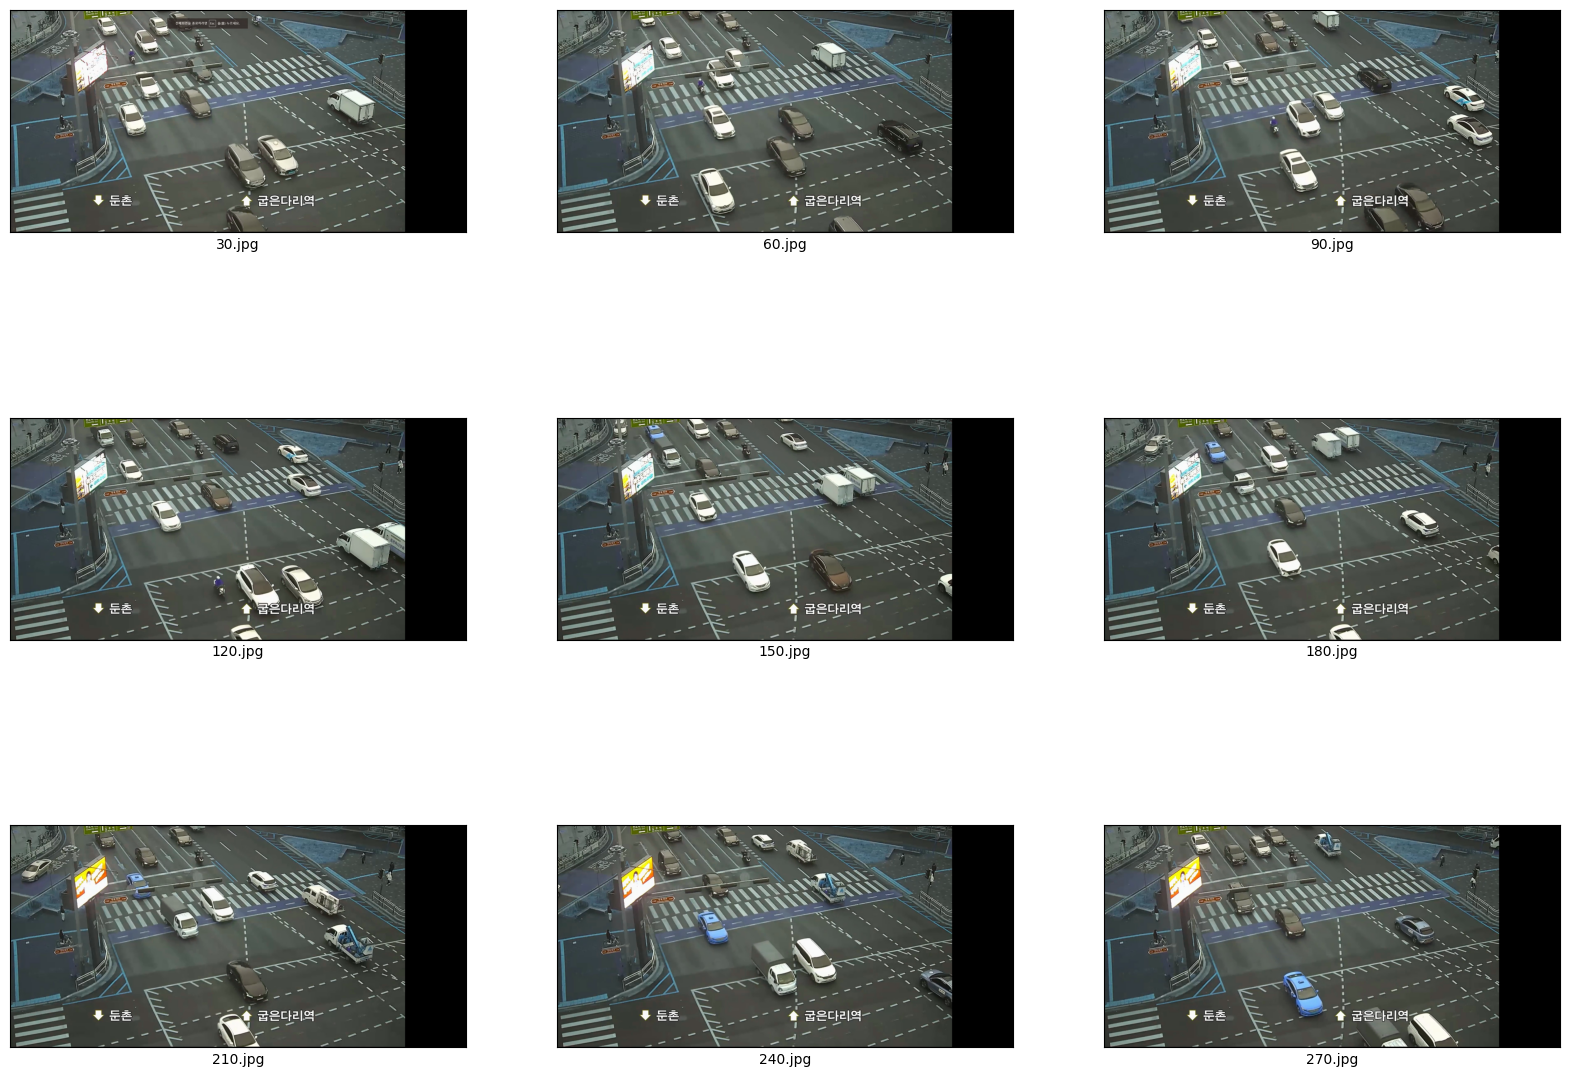

In [31]:
import matplotlib.pyplot as plt

# figure의 사이즈를 정의하고 몇 바이 몇 행렬에 그림들을 뿌릴 것인지 결정 (본 자료는 20개 이므로 4*5임)
fig = plt.figure(figsize=(20, 15))

rows = 3
cols = 3

i= 1

for filename in img_list:
    #이미지 파일들을 하나씩 읽어서 img2에 넣고
    img2 = cv2.imread(filename)

    #4X5 매트릭스 플롯에 하나씩 넣어 보이기
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img2)

    # xlabeling
    xlabel = img_list[i-1].split('/')[-1]

    ax.set_xlabel(xlabel)

    # 눈금 제거
    ax.set_xticks([]), ax.set_yticks([])
    i +=1

plt.show()


In [34]:
img_list[0]

'/content/drive/MyDrive/cctv/image30/30.jpg'

# <font color="red">**[미션2] 13개의 CCTV 영상으로 부터 최소 10장 이상의 이미지 샘플를 추출해 주시기 바랍니다.**
- 13개의 CCTV영상을 다운로드해 주세요.
- 13개의 CCTV영상을 구글드라이브의 "CCTV>cctv_list" 에 복사해 주세요.
- 13개 CCTV 영상에서 10개의 이미지 샘플를 추출해 주시기 바랍니다.
  (하나씩 돌려서 뽑을수 도 있겠지만, for cctv in cctv_list: 로 해서 하나씩 영상을 가지고 자동으로 추출할수 있도록 프로그래밍해주세요)
- 추출시 "추출한영상파일명_프레임위치.jpg(예시: CCTV영상2_30.jpg)" 로 저장해주세요.
- 저장 위치는 CCTV > cctv_data 입니다

## **1. 환경설정하기**

### **1.1 구글 드라이브 연결**

In [ ]:
# 코랩 사용 시 구글 드라이브 연결

# from google.colab import drive
# drive.mount('/content/drive')


### **1.2 필요한 라이브러리 임포트**

In [ ]:
# 필요 라이브러리 불러오기.

# import os
# import glob
# import cv2
# import matplotlib.pyplot as plt
# %matplotlib inline

### **1.3 동영상위치 및 저장할 위치 확인**
- /content/drive/MyDrive/CCTV/cctv_list : 동영상 위치
  - LABEL_PATH = "/content/drive/MyDrive/CCTV/cctv_list 로 저장 하고 확인하기
- /content/drive/MyDrive/CCTV/cctv_data : 이미지 위치
  - LABEL_IMAGE_PATH = "/content/drive/MyDrive/CCTV/cctv_data" 저장하고 확인하기

In [35]:
import os

LABEL_PATH = "/content/drive/MyDrive/CCTV/cctv_list"
if not os.path.exists(LABEL_PATH):
      os.makedirs(LABEL_PATH)

# CCTV리스트 영상 경로
if os.path.exists("/content/drive/MyDrive/CCTV/cctv_list") :  #경로가 있는지 확인
  LABEL_PATH = "/content/drive/MyDrive/CCTV/cctv_list"
  print(LABEL_PATH+"폴더가 잘생성되어 있습니다. 폴더안에 cctv 영상들을 넣어 주세요.")
else :
  print("/content/drive/MyDrive/CCTV에 'cctv_list' 폴더를 생성해 주시고 해당 폴더안에 cctv영상들을 넣어 주세요")


LABEL_IMAGE_PATH = "/content/drive/MyDrive/CCTV/cctv_data"
if not os.path.exists(LABEL_IMAGE_PATH):
      os.makedirs(LABEL_IMAGE_PATH)

#labeling할 이미지 저장 경로(영상에서부터 캡쳐한 이미지들)
if os.path.exists("/content/drive/MyDrive/CCTV/cctv_data") :  #경로가 있는지 확인
  LABEL_IMAGE_PATH = "/content/drive/MyDrive/CCTV/cctv_data"
  print(LABEL_IMAGE_PATH+"폴더가 잘생성되어 있습니다.")
else :
  print("/content/drive/MyDrive/CCTV에 'cctv_data' 폴더를 생성해 주세요")

/content/drive/MyDrive/CCTV/cctv_list폴더가 잘생성되어 있습니다. 폴더안에 cctv 영상들을 넣어 주세요.
/content/drive/MyDrive/CCTV/cctv_data폴더가 잘생성되어 있습니다.


## **2.동영상 데이터 정보 확인하기**

- 다음과 같은 형태로 모든 영상 정보가 리스트업 되게 함

CCTV영상9.mp4 정보:  True<BR>
 -가로 : 2216.0<BR>
 -세로 : 1080.0<BR>
 -총 프레임 수 : 374.0<BR>
 -FPS : 23.976023976023978<BR>
 -영상 길이 : 16 초 <BR>


In [40]:
#  영상들이 모여있는 폴더에서 파일명을 리스트로 가지고 오기(os.listdir를 활용, 이 명령은 디렉토리명은 없고 단지 파일명만 가지고온다.)

file_list = os.listdir(LABEL_PATH)

file_list

['CCTV영상1.mp4',
 'CCTV영상6.mp4',
 'CCTV영상2.mp4',
 'CCTV영상7.mp4',
 'CCTV영상3.mp4',
 'CCTV영상8.mp4',
 'CCTV영상9.mp4',
 'CCTV영상4.mp4',
 'CCTV영상11.mp4',
 'CCTV영상10.mp4',
 'CCTV영상12.mp4',
 'CCTV영상5.mp4',
 'CCTV영상13.mp4']

In [45]:
for i in file_list:
    print(LABEL_PATH + '/' + i)

/content/drive/MyDrive/CCTV/cctv_list/CCTV영상1.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상6.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상2.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상7.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상3.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상8.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상9.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상4.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상11.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상10.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상12.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상5.mp4
/content/drive/MyDrive/CCTV/cctv_list/CCTV영상13.mp4


In [51]:
# 하나씩 파일명을 가지고 오면서 정보 확인 (정보 확인 하는 방법은 위와 동일 하지만 for 구문을 활용해 전체 파일의 정보를 한번에 확인)

for i in file_list:
    video.release()
    video = cv2.VideoCapture(LABEL_PATH + '/' + i)

    # 영상의 가로, 세로, 총 프레임 수, FPS 정보로 가지고 옵니다.
    video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
    video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
    video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)
    video_fps = video.get(cv2.CAP_PROP_FPS)
    video_scale = video_length / video_fps

    print(i + ' 정보 : ' + str(video.isOpened()))
    print("가로 :", video_width)
    print("세로 :", video_height)
    print("총 프레임 수 :", video_length)
    print("FPS :", video_fps)
    print('영상 길이 : ', int(video_scale), '초')
    print('-' * 20)

video.release()

CCTV영상1.mp4 정보 : True
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 281.0
FPS : 23.976023976023978
영상 길이 :  11 초
--------------------
CCTV영상6.mp4 정보 : True
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 262.0
FPS : 23.976023976023978
영상 길이 :  10 초
--------------------
CCTV영상2.mp4 정보 : True
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 285.0
FPS : 23.976023976023978
영상 길이 :  11 초
--------------------
CCTV영상7.mp4 정보 : True
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 274.0
FPS : 23.976023976023978
영상 길이 :  11 초
--------------------
CCTV영상3.mp4 정보 : True
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 323.0
FPS : 23.976023976023978
영상 길이 :  13 초
--------------------
CCTV영상8.mp4 정보 : True
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 340.0
FPS : 23.976023976023978
영상 길이 :  14 초
--------------------
CCTV영상9.mp4 정보 : True
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 374.0
FPS : 23.976023976023978
영상 길이 :  15 초
--------------------
CCTV영상4.mp4 정보 : True
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 498.0
FPS : 23.976023976023978
영상 길이 :  20 초
-------------

## **3.동영상로 부터 이미지 데이터 추출하기**
 - 각 동영상의 Frame수를 가지고 10등분 이상하여 10개의 이미지만 추출하기
 - 방법은 전체 Frame수를 10을 나눈 값을이 추출 되는 프레임 번호가 됨
 - Frame 번호에 따른 배수로 가지고 오는 방법도 있음
 - 프레임수가 120이면, 10개를 취할려면 12,24,36... 형태로 가지고 와야함
 - 추출된 이미지는 모두 하나의 폴더인 cctv_data에 저장함

In [52]:
#[참조1] Frequncy 도출하는 코드, 즉 총 프레임수가 281개 이므로 프레임이 28번의 배수 일때만다 가져오는 코드임
from google.colab.patches import cv2_imshow

video = cv2.VideoCapture("/content/drive/MyDrive/CCTV/cctv_list/CCTV영상1.mp4")
print(video.get(cv2.CAP_PROP_FRAME_COUNT))

# 몇장을 추출할것인지요
n = 10

# 현 비디오의 전체 Frame 수 정보 가져오기
video.get(cv2.CAP_PROP_FRAME_COUNT)

# 몇번마다 추출할것인지
frequency = int(video.get(cv2.CAP_PROP_FRAME_COUNT)/n)

print(frequency)

video.release()


281.0
28


In [53]:
#[참조2] 하나의 영상에만 적용하여 정확히 나오는지 확인하는 코드

video = cv2.VideoCapture("/content/drive/MyDrive/CCTV/cctv_list/CCTV영상1.mp4")

while(video.isOpened()):
  ret,frame = video.read()


  image = cv2.resize(frame, (450, 300))

  # 몇장을 추출할것인지요
  n = 10

  # 현 비디오의 전체 Frame 수 정보 가져오기
  video.get(cv2.CAP_PROP_FRAME_COUNT)

  # 몇번마다 추출할것인지
  frequency = int(video.get(cv2.CAP_PROP_FRAME_COUNT)/n)

  if(int(video.get(cv2.CAP_PROP_POS_FRAMES)) % frequency ==0):
    cv2_imshow(image)
    print('저장된 프레임 위치 : ' + str(video.get(cv2.CAP_PROP_POS_FRAMES)))
    #cv2.imwrite(LABEL_IMAGE_PATH+"/"+ FILE_NAME.split('.')[0] + str(video.get(cv2.CAP_PROP_POS_FRAMES))+".jpg", image)

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
      break



video.release()

Output hidden; open in https://colab.research.google.com to view.

In [57]:
for i in file_list:
    print(i.split('.')[-2])

CCTV영상1
CCTV영상6
CCTV영상2
CCTV영상7
CCTV영상3
CCTV영상8
CCTV영상9
CCTV영상4
CCTV영상11
CCTV영상10
CCTV영상12
CCTV영상5
CCTV영상13


In [59]:
# 위의 코드를 활용해 전체적인 CCTV파일들에서 10장씩 뽑아 오고 cctv_data에 저장하기

for i in file_list:
    video.release()
    video = cv2.VideoCapture(LABEL_PATH + '/' + i)


    while(video.isOpened()):
        ret,frame = video.read()


        image = cv2.resize(frame, (450, 300))

        # 몇장을 추출할것인지요
        n = 10

        # 현 비디오의 전체 Frame 수 정보 가져오기
        video.get(cv2.CAP_PROP_FRAME_COUNT)

        # 몇번마다 추출할것인지
        frequency = int(video.get(cv2.CAP_PROP_FRAME_COUNT)/n)

        if(int(video.get(cv2.CAP_PROP_POS_FRAMES)) % frequency == 0):
            cv2_imshow(image)
            print('저장된 프레임 위치 : ' + str(video.get(cv2.CAP_PROP_POS_FRAMES)))
            cv2.imwrite(LABEL_IMAGE_PATH+"/"+ i.split('.')[-2] + '_' + str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", image)
            # LABEL_IMAGE_PATH : '/content/drive/MyDrive/CCTV/cctv_data'

        if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
            break

video.release()


Output hidden; open in https://colab.research.google.com to view.

In [62]:
img_list = glob.glob('/content/drive/MyDrive/CCTV/cctv_data/*.jpg')

img_list

['/content/drive/MyDrive/CCTV/cctv_data/CCTV영상1_28.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상1_56.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상1_84.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상1_112.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상1_140.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상1_168.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상1_196.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상1_224.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상1_252.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상1_280.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상6_26.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상6_52.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상6_78.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상6_104.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상6_130.jpg',
 '/content/drive/MyDrive/CCTV/cctv_data/CCTV영상6_156.jpg',
 '/content/dri

In [63]:
# images 행렬(subplot)로 표현

# figure의 사이즈를 정의하고 몇 바이 몇 행렬에 그림들을 뿌릴 것인지 결정
fig = plt.figure(figsize=(26, 20))
rows = 13
cols = 10
i= 1

for filename in img_list:
  #이미지 파일들을 하나씩 읽어서 img2에 넣고
  img2 = cv2.imread(filename)

  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(img2)

  xlabel = filename.split('/')[-1]

  ax.set_xlabel(xlabel)

  # 눈금 제거
  ax.set_xticks([]), ax.set_yticks([])
  i +=1

plt.show()

Output hidden; open in https://colab.research.google.com to view.